# Python examples and notes for Machine Learning for Computational Linguistics

**(C) 2017 by [Damir Cavar](http://cavar.me/damir/)**

**Version:** 1.0, January 2017

**License:** [Creative Commons Attribution-ShareAlike 4.0 International License](https://creativecommons.org/licenses/by-sa/4.0/) ([CA BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/))

This is a tutorial related to the discussion of SpamAssassin in the textbook [Machine Learning: The Art and Science of Algorithms that Make Sense of Data](https://www.cs.bris.ac.uk/~flach/mlbook/) by [Peter Flach](https://www.cs.bris.ac.uk/~flach/).

This tutorial was developed as part of my course material for the course Machine Learning for Computational Linguistics in the [Computational Linguistics Program](http://cl.indiana.edu/) of the [Department of Linguistics](http://www.indiana.edu/~lingdept/) at [Indiana University](https://www.indiana.edu/).

## SpamAssassin

The linear classifier can be described as follows. A test $x$ returns $1$ (for true), if it succedes, otherwise it returns $0$. The $i^{th}$ test in the set of tests $x$ is refered to as $x_i$. The weight of the $i^{th}$ test is denoted as $w_i$.

The total score of test results for a specific e-mail can be expressed as the sum of the products of $n$ test results and corresponding weights, that is $\sum_{i=1}^{n} w_i x_i$.

If we assume two tests $x_1$ and $x_2$ with the corresponding weights $w_1 = 4$ and $w_2 = 4$, for some e-mail $e_1$ the tests could result in two positives $x_1 = 1$ and $x_2 = 1$. The computation of the equation above for the results can be coded in Python in the following way:

In [3]:
x = (1, 0)
w = (4, 4)

result = 0
for e in range(len(x)):
    result += x[e] * w[e]

print(result)

4


If we specify a threshold $t$ that seperates spam from ham, with $t = 5$ in our example, the decision for spam or ham could be coded in Python as:

In [4]:
t = 5

if result >= t:
    print("spam", result)
else:
    print("ham", result)

ham 4


In the code example above we define $x$ and $w$ as vectors of the same length. The computation of the result could be achieved even easier by making use of linear algebra and calculating the dot-product of $x$ and $w$:

In [5]:
import numpy

wn = [4, 4]
xn = [1, 1]

numpy.dot(wn, xn)

8

We can use a trick to manipulate the data to be rooted in the origin of an extended coordiante system. We can add a new dimension by adding a new virtual test result $x_0 = 1$ and a corresponding weight $w_0 = -t$. This way the decision boundary $t$ can be moved to $0$:

In [6]:
x0 = (1, 1, 1)
w0 = (-t, 4, 4)

numpy.dot(w0, x0)

3

This kind of transformation of the vector space is usefull for other purposes as well. More on that later.

## Creating and Using an SVM Classifier

The following example is inspired and partially taken from the [page Linear SVC Machine learning SVM example with Python](https://pythonprogramming.net/linear-svc-example-scikit-learn-svm-python/).

To start learning and classifying, we will need to import some Python modules in addition to the ones above:

In [7]:
import matplotlib.pyplot
from matplotlib import style

style.use("ggplot")

from sklearn import svm

We will use two features that represent the axis on a graph. The samples are tuples taken from the ordered arrays $x$ and $y$, that is, the $i^{th}$ sample is $X_i = (x_i, y_i)$, sample $X_1 = (1,2)$, sample $X_2 = (5, 8)$, and so on.

In [8]:
x = [1, 5, 1.5, 8, 1, 9]
y = [2, 8, 1.8, 8, 0.6, 11]

We can plot the datapoints now:

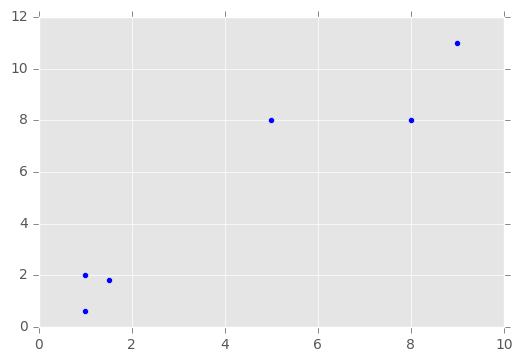

In [9]:
matplotlib.pyplot.scatter(x,y)
matplotlib.pyplot.show()

We can create an array of features, that is, we convert the coordinates in the $x$ and $y$ feature arrays above to an array of tuples that represent the datapoints or features of samples:

In [10]:
X = numpy.array([[1,2],
             [5,8],
             [1.5,1.8],
             [8,8],
             [1,0.6],
             [9,11]])

Assuming two classes represented by $0$ and $1$, we can encode the assignment of the datapoints in $X$ to classes $0$ or $1$ by using a vector with the class labels in the order of the samples in $X$. The $i^{th}$ datapoint of $X$ is assigned to the $i^{th}$ class label in $y$.

In [11]:
y = [0,1,0,1,0,1]

We define a classifier as a linear Support Vector Classifier using the *svm* module of [Scikit-learn](http://scikit-learn.org/):

In [12]:
classifier = svm.SVC(kernel='linear')

We train the classifier using our features in *X* and the labels in *y*:

In [13]:
classifier.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

We can now create a new sample and ask the classifier for a guess to which class this sample belongs. Note that in the following code we generate a *numpy array* from the features $[0.58, 0.76]$. This array needs to be reshaped to an array the contains one element, an array with a set of sample features. 

In [14]:
sample = numpy.array([0.58,0.76]).reshape(1,-1)

print("Sample:", sample)

print(" Class:", classifier.predict(sample))

Sample: [[ 0.58  0.76]]
 Class: [0]


Instead of using the *reshape()* function, we could have also defined the sample directly as an array with a sample feature array:

In [27]:
sample = numpy.array( [ [0.58,0.76] ] )

The following code will visualize the data and the identified hyperplane that separates the two classes.

[ 0.1380943   0.24462418]


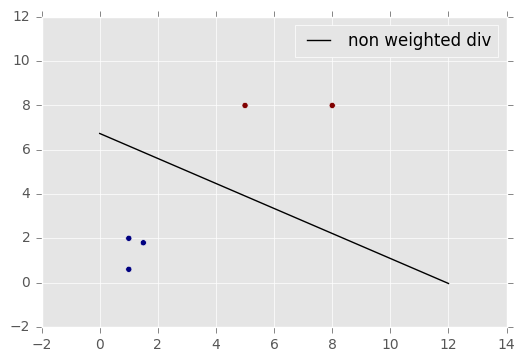

In [15]:
w = classifier.coef_[0]
print(w)

a = -w[0] / w[1]

xx = numpy.linspace(0,12)
yy = a * xx - classifier.intercept_[0] / w[1]

h0 = matplotlib.pyplot.plot(xx, yy, 'k-', label="non weighted div")

matplotlib.pyplot.scatter(X[:, 0], X[:, 1], c = y)
matplotlib.pyplot.legend()
matplotlib.pyplot.show()

(C) 2017 by [Damir Cavar](http://cavar.me/damir/) - [Creative Commons Attribution-ShareAlike 4.0 International License](https://creativecommons.org/licenses/by-sa/4.0/) ([CA BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/)); portions taken from the referenced sources.